In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [ ]:
!pip install -U scikit-fuzzy

Girdi ve çıktıların belirlenmesi

In [ ]:
kalite=ctrl.Antecedent(np.arange(0,11,1),"kalite")
servis=ctrl.Antecedent(np.arange(0,11,1),"servis")
bahsis=ctrl.Consequent(np.arange(0,26,1),"bahsis")

Servis ve Kalite girdileri için üyelik fonksiyonları belirlenir.

In [ ]:
kalite.automf(3)
servis.automf(3)

Çıktı değeri için üyelik fonksiyonu belirlenir.

In [ ]:
bahsis["Düşük"]=fuzzy.trimf(bahsis.universe,[0,0,13])
bahsis["Orta"]=fuzzy.trimf(bahsis.universe,[0,13,25])
bahsis["Yüksek"]=fuzzy.trimf(bahsis.universe,[13,25,25])

Üyeliklerin daha detaylı anlaşılabilmesi için, görsel olarak bu üyelikler incelenebilir. İncelemek için aşağıda verilen kod kısmı bu görevi yerine getirmektedir.

Kalite girdisine ait üyelik fonksiyonlarının görsel olarak incelenmesi

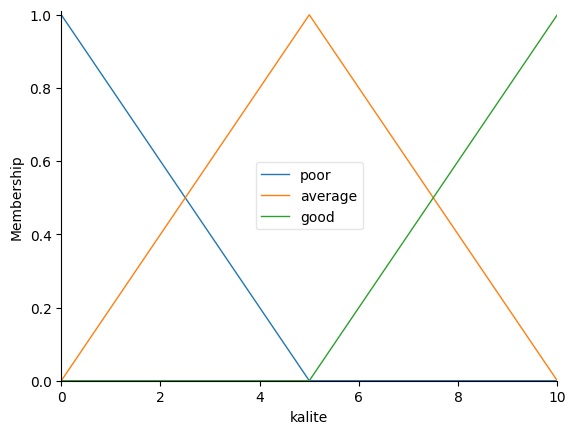

In [ ]:
kalite.view()

Servis girdisine ait üyelik fonksiyonlarının görsel olarak incelenmesi

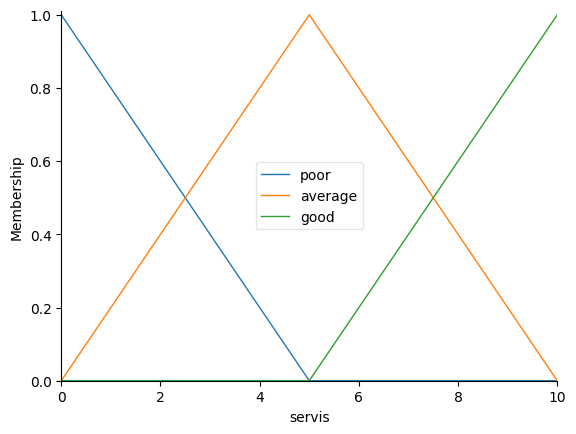

In [ ]:
servis.view()

Bahşiş girdisine ait üyelik fonksiyonlarının görsel olarak incelenmesi

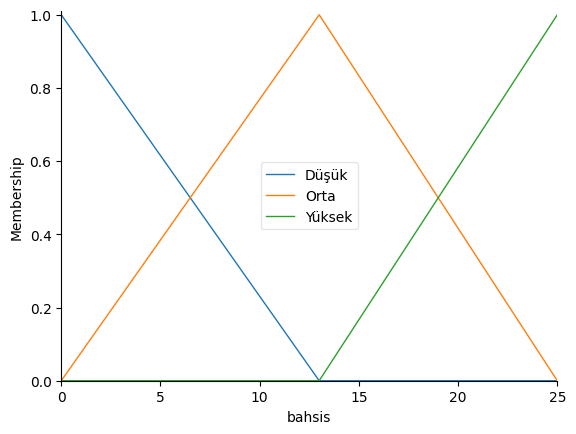

In [ ]:
bahsis.view()

Daha sonra bulanık kuralları sistem üzerinde tanımlanır. Belirlenmiş olan kurallar şu şekildeydi:
- Eğer servis iyi ya da yemek kalitesi iyi ise, bahşiş yüksek olacak.
- Eğer servis idare eder durumdaysa, bahşiş orta düzeyde olacak.
- Eğer servis kötü ya da yemek kalitesi de kötü ise, bahşiş düşük olacak.

In [ ]:
kural1=ctrl.Rule(kalite["good"] | servis["good"], bahsis["Yüksek"])
kural2=ctrl.Rule(servis["average"], bahsis["Orta"])
kural3=ctrl.Rule(kalite["poor"] | servis["poor"], bahsis["Düşük"])

Kurallardan sonra, bahşiş sistemini belirleyecek olan kontrol mekanizması tasarlanır.

In [ ]:
bahsisKontrol=ctrl.ControlSystem([kural1,kural2,kural3])
bahsisBelirleme=ctrl.ControlSystemSimulation(bahsisKontrol)


Ardından yemek kalitesi ve servis kalitesine değerler verilerek, bahşiş hesaplaması yapılır.

In [ ]:
bahsisBelirleme.input["kalite"]=3.2
bahsisBelirleme.input["servis"]=2.4
bahsisBelirleme.compute()
print(bahsisBelirleme.output["bahsis"])

10.932483520791978


Bahşişin görsel olarak incelenmesi

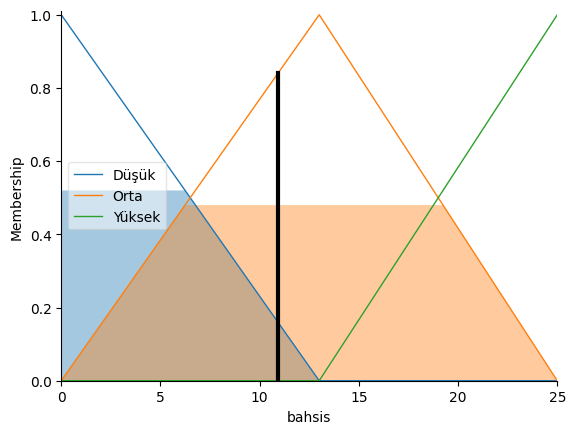

In [ ]:
bahsis.view(sim=bahsisBelirleme)